<a href="https://colab.research.google.com/github/RamyaAnnamalai1509/Mini-Project-2/blob/main/PROJECT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pymysql

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 3.3 MB/s eta 0:00:00


In [ ]:
import pymysql
import pandas as pd
def get_db_connection():
    return pymysql.connect(
        host="gateway01.ap-southeast-1.prod.aws.tidbcloud.com",   # e.g., "localhost"
        user="2UUkERace9vWJvM.root",   # e.g., "root"
        password="csTRyi9ITkoTl4XY",
        database="PROJECT2",
        ssl_verify_cert=True,
        ssl_verify_identity=True,
        cursorclass=pymysql.cursors.DictCursor
    )

           0               1
0  544232.26     West Bengal
1  445597.62   Uttar Pradesh
2  335040.10          Punjab
3  315185.40  Andhra Pradesh
4  291201.51      Tamil Nadu
5  282532.93          Orissa
6  231759.00           Bihar


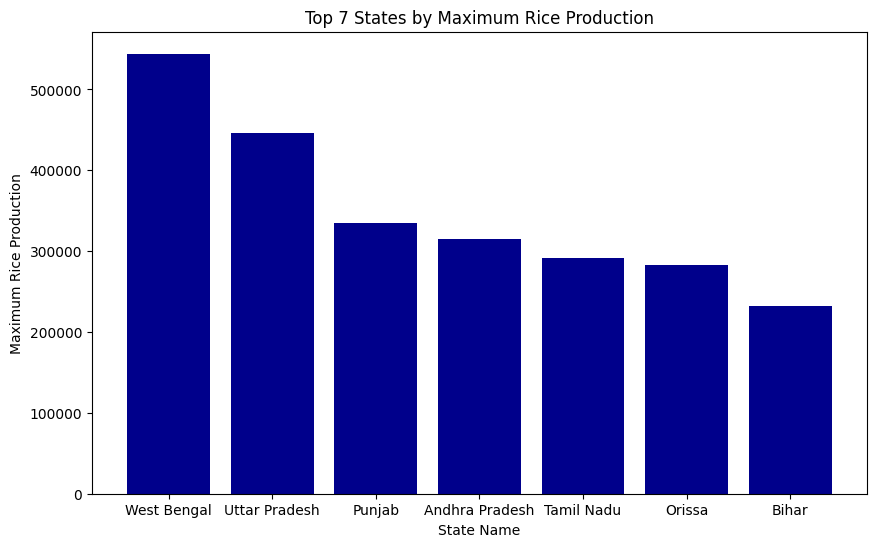

In [ ]:
import matplotlib.pyplot as plt
import pymysql
import pandas as pd
connection = pymysql.connect(
    host="gateway01.ap-southeast-1.prod.aws.tidbcloud.com",
    port=4000,
    user="2UUkERace9vWJvM.root",
    password="csTRyi9ITkoTl4XY",
    database="PROJECT2",
    ssl_verify_cert=True,
    ssl_verify_identity=True,
)

try:
  with connection.cursor() as cursor:
    query = """
    SELECT SUM(rice_production) AS max_rice_production, state_name  # Use MAX aggregate function and alias the column
    FROM AGRI
    GROUP BY state_name
    ORDER BY max_rice_production DESC  # Order by the aliased column
    LIMIT 7
    """
    cursor.execute(query)
    result = cursor.fetchall()
    df = pd.DataFrame(result)
    print(df)
    df.columns = ['max_rice_production', 'state_name']
    plt.figure(figsize=(10, 6))
    plt.bar(df['state_name'], df['max_rice_production'], color='darkblue')
    plt.xlabel('State Name')
    plt.ylabel('Maximum Rice Production')
    plt.title('Top 7 States by Maximum Rice Production')
    plt.show()
finally:
  connection.close()

In [ ]:
connection = pymysql.connect(
    host="gateway01.ap-southeast-1.prod.aws.tidbcloud.com",
    port=4000,
    user="2UUkERace9vWJvM.root",
    password="csTRyi9ITkoTl4XY",
    database="PROJECT2",
    ssl_verify_cert=True,
    ssl_verify_identity=True,
)
mycursor = connection.cursor()

           0               1
0  970210.07   Uttar Pradesh
1  593848.90          Punjab
2  348429.60         Haryana
3  338644.25  Madhya Pradesh
4  265994.99       Rajasthan


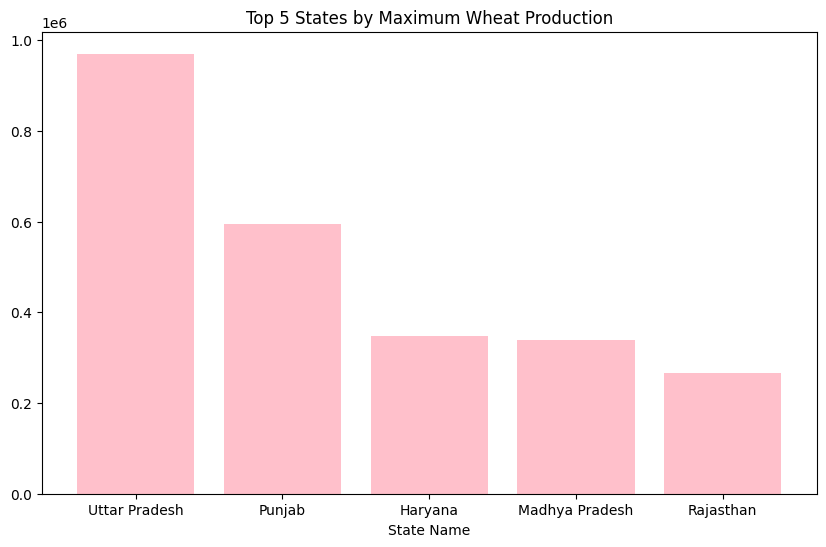

In [ ]:
mycursor.execute("SELECT SUM(wheat_production) AS total_wheat_production_by_state, state_name FROM AGRI GROUP BY state_name ORDER BY SUM(wheat_production) DESC LIMIT 5")
myresult = mycursor.fetchall()
df = pd.DataFrame(myresult)
print(df)
df.columns = ['max_wheat_production', 'state_name']
plt.figure(figsize=(10, 6))
plt.bar(df['state_name'], df['max_wheat_production'], color='pink')
plt.xlabel('State Name')
plt.title('Top 5 States by Maximum Wheat Production')
plt.show()
connection.close()

In [ ]:
connection = pymysql.connect(
    host="gateway01.ap-southeast-1.prod.aws.tidbcloud.com",
    port=4000,
    user="2UUkERace9vWJvM.root",
    password="csTRyi9ITkoTl4XY",
    database="PROJECT2",
    ssl_verify_cert=True,
    ssl_verify_identity=True,
)
mycursor = connection.cursor()

In [ ]:
mycursor.execute("""
SELECT
    state_name,
    SUM(wheat_production) AS total_wheat_production_by_state,  -- Calculate total wheat production for each state
    (SUM(wheat_production) / (SELECT SUM(wheat_production) FROM AGRI)) * 100 AS percentage
FROM AGRI
GROUP BY state_name
ORDER BY percentage DESC
LIMIT 5;
""")
myresult = mycursor.fetchall()
df = pd.DataFrame(myresult)
print(df)
df.columns = ['state_name', 'total_wheat_production_by_state', 'percentage']

connection.close()

                0          1          2
0   Uttar Pradesh  970210.07  33.014067
1          Punjab  593848.90  20.207343
2         Haryana  348429.60  11.856276
3  Madhya Pradesh  338644.25  11.523302
4       Rajasthan  265994.99   9.051211


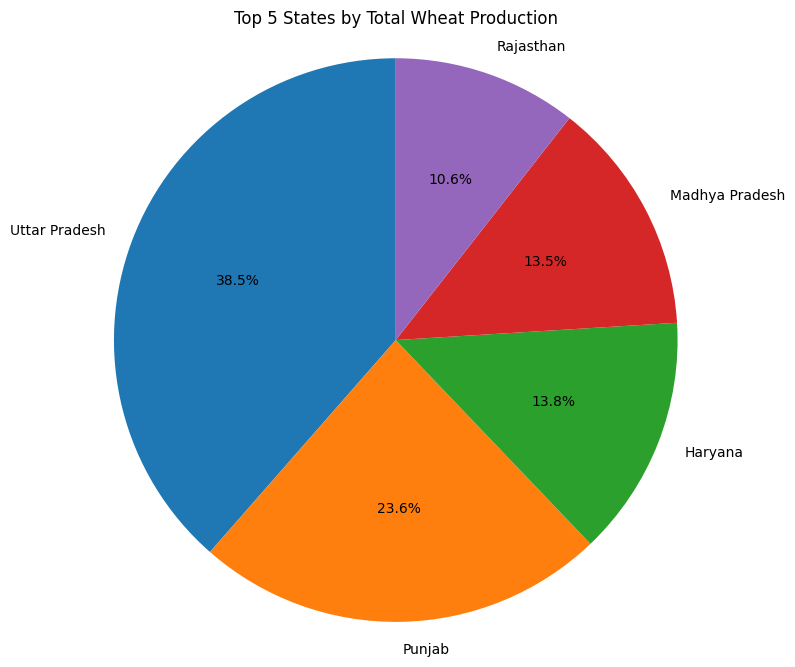

In [ ]:
df.columns = ['state_name', 'total_wheat_production_by_state', 'percentage']
plt.figure(figsize=(8, 8))
plt.pie(df['percentage'], labels=df['state_name'], autopct='%1.1f%%', startangle=90)
plt.title('Top 5 States by Total Wheat Production')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
connection = pymysql.connect(
    host="gateway01.ap-southeast-1.prod.aws.tidbcloud.com",
    port=4000,
    user="2UUkERace9vWJvM.root",
    password="csTRyi9ITkoTl4XY",
    database="PROJECT2",
    ssl_verify_cert=True,
    ssl_verify_identity=True,
)
mycursor = connection.cursor()

           0               1
0  153594.79  Madhya Pradesh
1  126224.01         Gujarat
2  122726.86       Rajasthan
3   95567.91     Maharashtra
4   76888.09  Andhra Pradesh


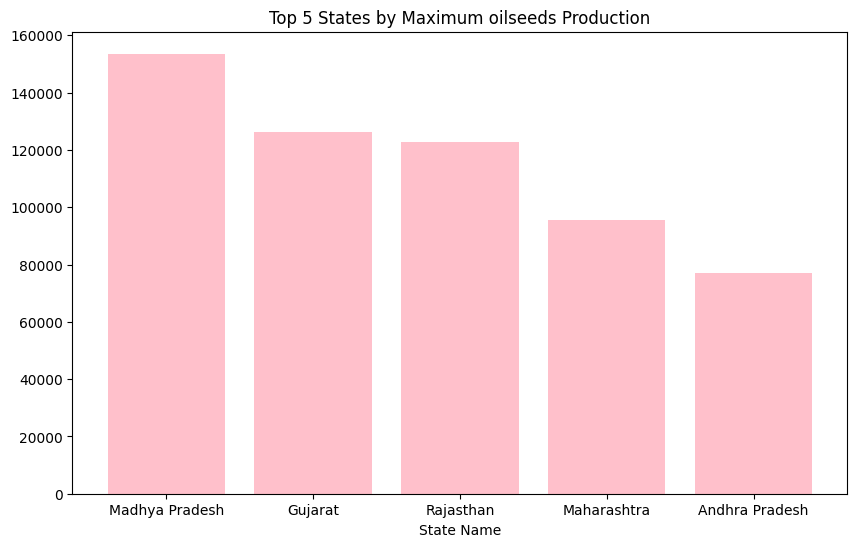

In [ ]:
mycursor.execute("SELECT SUM(oilseeds_production) AS total_oilseeds_production_by_state, state_name FROM AGRI GROUP BY state_name ORDER BY SUM(oilseeds_production) DESC LIMIT 5")
myresult = mycursor.fetchall()
df = pd.DataFrame(myresult)
print(df)
df.columns = ['max_oilseeds_production', 'state_name']
plt.figure(figsize=(10, 6))
plt.bar(df['state_name'], df['max_oilseeds_production'], color='pink')
plt.xlabel('State Name')
plt.title('Top 5 States by Maximum oilseeds Production')
plt.show()

       0               1
0  10776       Karnataka
1   5599     Maharashtra
2   4449  Andhra Pradesh
3   1393       Telangana
4   1078          Punjab
5    745      Tamil Nadu
6    476   Uttar Pradesh


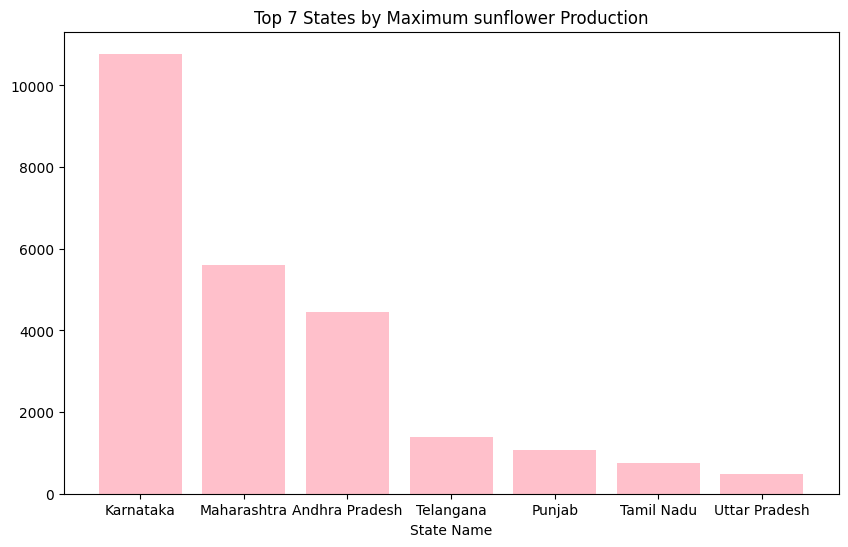

In [ ]:
mycursor.execute("SELECT SUM(sunflower_production) AS total_sunflower_production_by_state, state_name FROM AGRI GROUP BY state_name ORDER BY SUM(sunflower_production) DESC LIMIT 7")
myresult = mycursor.fetchall()
df = pd.DataFrame(myresult)
print(df)
df.columns = ['max_sunflower_production', 'state_name']
plt.figure(figsize=(10, 6))
plt.bar(df['state_name'], df['max_sunflower_production'], color='pink')
plt.xlabel('State Name')
plt.title('Top 7 States by Maximum sunflower Production')
plt.show()

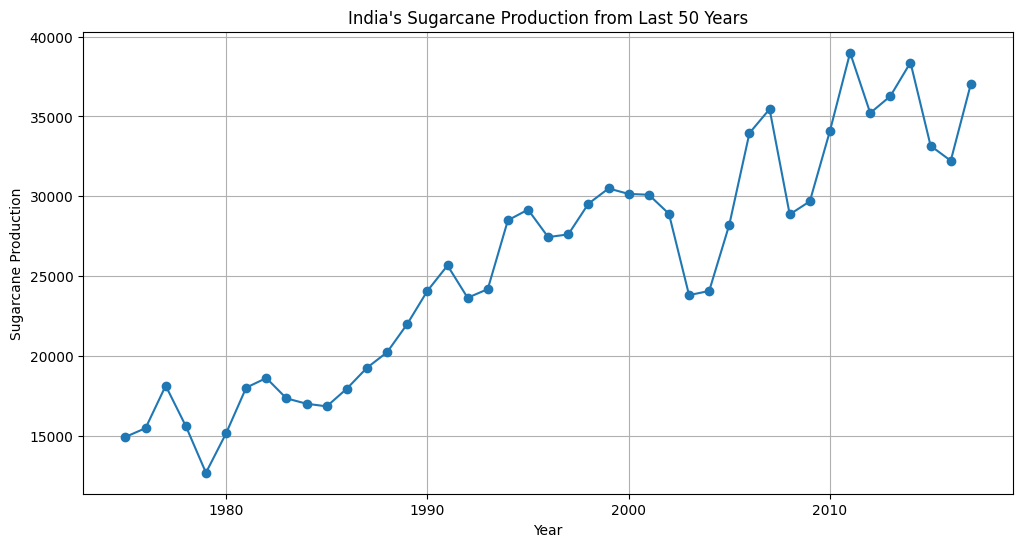

In [ ]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
connection = pymysql.connect(
    host="gateway01.ap-southeast-1.prod.aws.tidbcloud.com",
    port=4000,
    user="2UUkERace9vWJvM.root",
    password="csTRyi9ITkoTl4XY",
    database="PROJECT2",
    ssl_verify_cert=True,
    ssl_verify_identity=True,
)

try:
  with connection.cursor() as cursor:
    query = """
    SELECT year, SUM(sugarcane_production) AS total_production
    FROM AGRI
    WHERE year >= YEAR(CURDATE()) - 50
    GROUP BY year
    ORDER BY year;
    """
    cursor.execute(query)
    result = cursor.fetchall()
    df = pd.DataFrame(result)

    # Plotting the line chart
    df.columns = ['year', 'total_production']
    plt.figure(figsize=(12, 6))
    plt.plot(df['year'], df['total_production'], marker='o')
    plt.xlabel('Year')
    plt.ylabel('Sugarcane Production')
    plt.title("India's Sugarcane Production from Last 50 Years")
    plt.grid(True)
    plt.show()

finally:
  connection.close()

       0          1          2
0   1975   27150.41   46144.36
1   1976   27580.73   40226.45
2   1977   30003.66   50439.41
3   1978   34078.29   50868.02
4   1979   30742.00   40560.64
5   1980   35659.06   52796.25
6   1981   37154.29   52486.37
7   1982   42402.18   45081.34
8   1983   44859.22   57766.50
9   1984   43846.97   56451.83
10  1985   46811.09   62289.85
11  1986   43499.94   58592.01
12  1987   45504.65   54890.34
13  1988   53682.89   68923.09
14  1989   52123.31   73530.86
15  1990   54449.14   71613.37
16  1991   55378.51   71858.31
17  1992   56665.30   70205.91
18  1993   59400.67   77179.69
19  1994   65462.30   79273.91
20  1995   61157.13   72615.41
21  1996   68631.56   78120.14
22  1997   65085.19   80504.09
23  1998   70057.41   82394.23
24  1999   76209.47   86527.07
25  2000   69617.04   83476.59
26  2001   72186.10   91556.12
27  2002   65404.66   69917.86
28  2003   72317.08   84971.15
29  2004   69013.36   80951.64
30  2005   68379.02   87315.59
31  2006

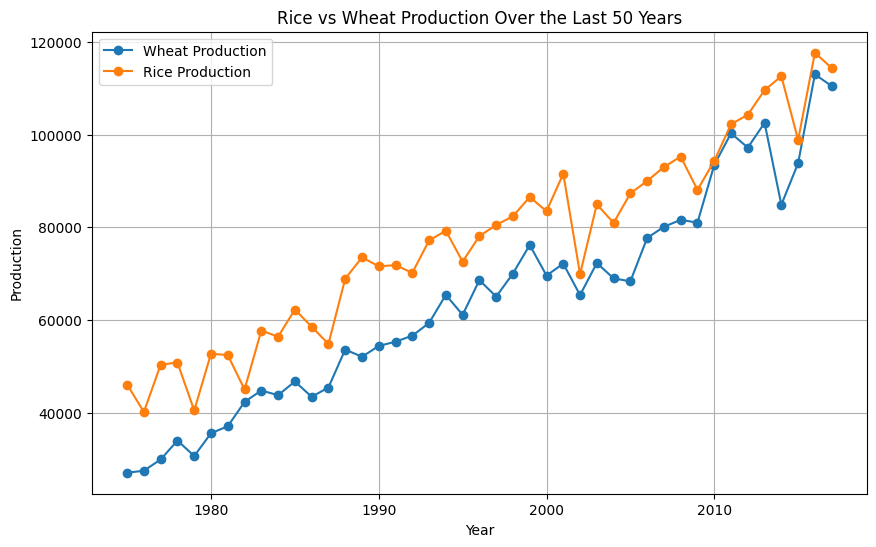

In [ ]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt

connection = pymysql.connect(
    host="gateway01.ap-southeast-1.prod.aws.tidbcloud.com",
    port=4000,
    user="2UUkERace9vWJvM.root",
    password="csTRyi9ITkoTl4XY",
    database="PROJECT2",
    ssl_verify_cert=True,
    ssl_verify_identity=True,
)

try:
  with connection.cursor() as cursor:

    query = """
    SELECT year, SUM(wheat_production) AS total_production, SUM(rice_production) AS total_rice_production
    FROM AGRI
    WHERE year >= YEAR(CURDATE()) - 50
    GROUP BY year
    ORDER BY year;
    """
    cursor.execute(query)
    result = cursor.fetchall()
    df = pd.DataFrame(result)
    print(df)
    df.columns = ['Year', 'Total Wheat Production', 'Total Rice Production']
    plt.figure(figsize=(10, 6))
    plt.plot(df['Year'], df['Total Wheat Production'], label='Wheat Production', marker='o')
    plt.plot(df['Year'], df['Total Rice Production'], label='Rice Production', marker='o')
    plt.xlabel('Year')
    plt.ylabel('Production')
    plt.title('Rice vs Wheat Production Over the Last 50 Years')
    plt.legend()
    plt.grid(True)
    plt.show()


finally:
  connection.close()

                0         1
0        Midnapur  98868.28
1         Burdwan  71422.15
2     24 Parganas  63011.99
3         Birbhum  42213.81
4         Bankura  40165.20
5     Murshidabad  37261.24
6   West Dinajpur  35224.87
7         Hooghly  30962.21
8           Nadia  28016.30
9         Purulia  23147.50
10          Malda  22497.83
11    Cooch Behar  20949.15
12     Jalpaiguri  17372.00
13         Howrah  10264.53
14     Darjeeling   2855.20


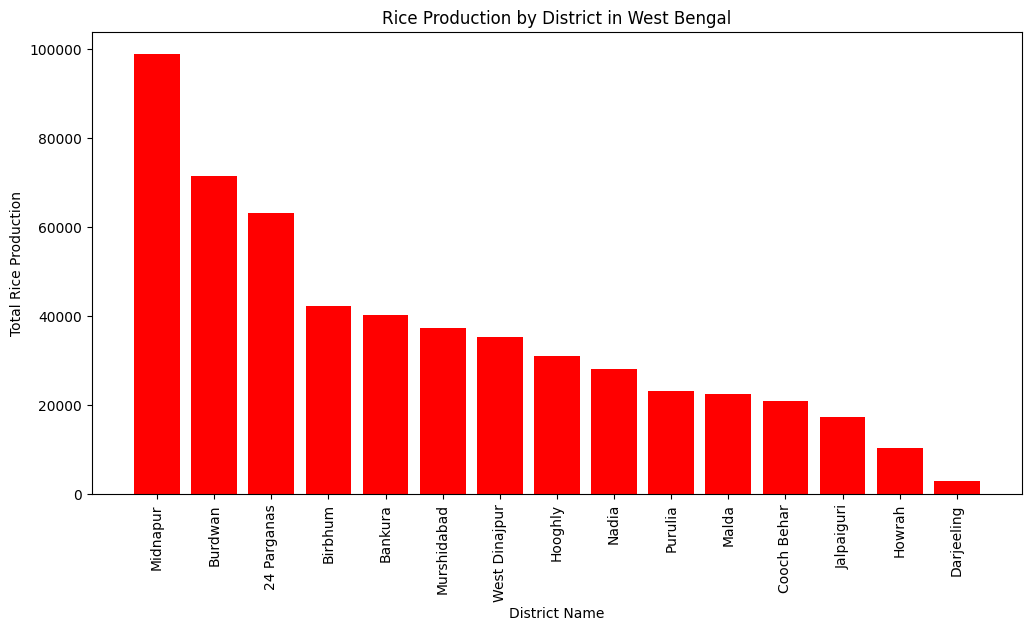

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

connection = pymysql.connect(
    host="gateway01.ap-southeast-1.prod.aws.tidbcloud.com",
    port=4000,
    user="2UUkERace9vWJvM.root",
    password="csTRyi9ITkoTl4XY",
    database="PROJECT2",
    ssl_verify_cert=True,
    ssl_verify_identity=True,
)

try:
  with connection.cursor() as cursor:
    query = """
    SELECT dist_name, SUM(rice_production) AS total_rice_production
    FROM AGRI
    WHERE state_name = 'West Bengal'
    GROUP BY dist_name
    ORDER BY total_rice_production DESC;
    """
    cursor.execute(query)
    result = cursor.fetchall()
    df = pd.DataFrame(result)
    print(df)

    # Plotting the bar chart
    df.columns=['dist_name', 'total_rice_production']
    plt.figure(figsize=(12, 6))
    plt.bar(df['dist_name'], df['total_rice_production'], color = 'red')
    plt.xlabel('District Name')
    plt.ylabel('Total Rice Production')
    plt.title('Rice Production by District in West Bengal')
    plt.xticks(rotation=90)
    plt.show()

finally:
  connection.close()


               0         1     2
0  Uttar Pradesh  35798.60  2017
1  Uttar Pradesh  35120.90  2016
2  Uttar Pradesh  32271.69  2011
3  Uttar Pradesh  31611.63  2013
4  Uttar Pradesh  30602.91  2010
5  Uttar Pradesh  29110.93  2008
6  Uttar Pradesh  29041.28  2012
7  Uttar Pradesh  27910.80  2009
8  Uttar Pradesh  27010.39  2015
9  Uttar Pradesh  26445.45  2003


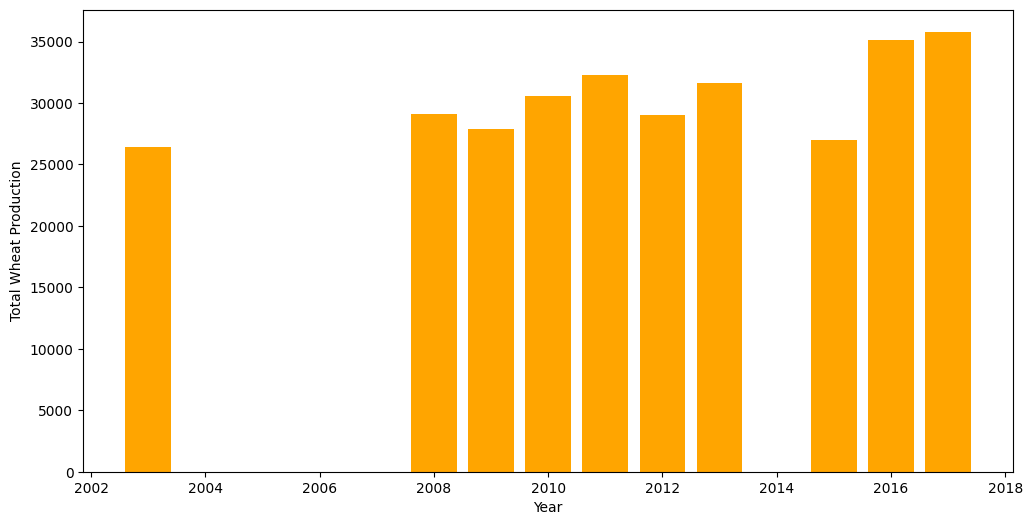

In [ ]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt

connection = pymysql.connect(
    host="gateway01.ap-southeast-1.prod.aws.tidbcloud.com",
    port=4000,
    user="2UUkERace9vWJvM.root",
    password="csTRyi9ITkoTl4XY",
    database="PROJECT2",
    ssl_verify_cert=True,
    ssl_verify_identity=True,
)

try:
  with connection.cursor() as cursor:
    query = """
    SELECT state_name, SUM(wheat_production) AS total_wheat_production, year
    FROM AGRI
    WHERE state_name = 'Uttar Pradesh'
    GROUP BY year
    ORDER BY total_wheat_production DESC
    LIMIT 10;
    """
    cursor.execute(query)
    result = cursor.fetchall()
    df = pd.DataFrame(result)
    print(df)
     # Plotting the bar chart
    df.columns=['state_name', 'total_wheat_production', 'year']
    plt.figure(figsize=(12, 6))
    plt.bar(df['year'], df['total_wheat_production'], color = 'orange')
    plt.xlabel('Year')
    plt.ylabel('Total Wheat Production')
    plt.show()
finally:
  connection.close()


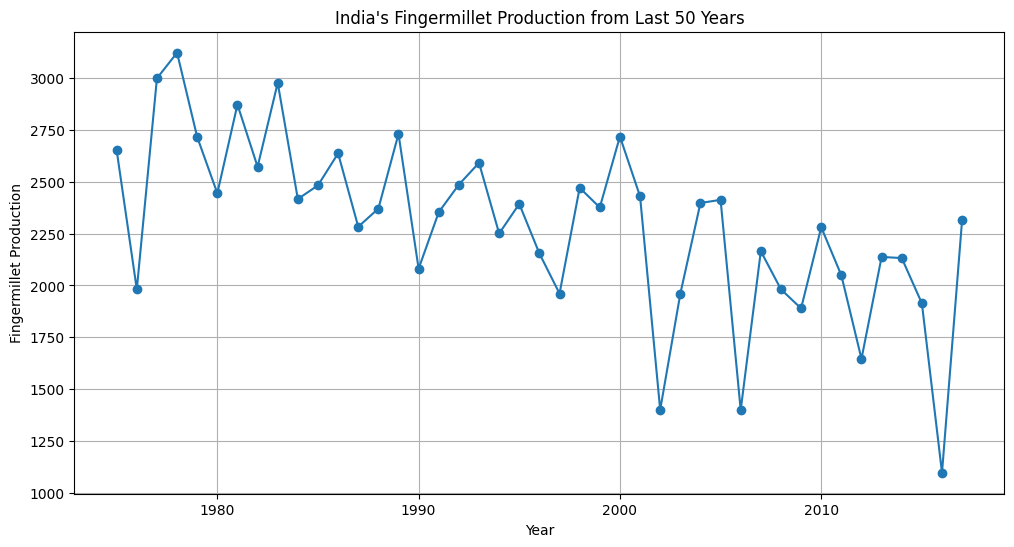

In [ ]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt

connection = pymysql.connect(
    host="gateway01.ap-southeast-1.prod.aws.tidbcloud.com",
    port=4000,
    user="2UUkERace9vWJvM.root",
    password="csTRyi9ITkoTl4XY",
    database="PROJECT2",
    ssl_verify_cert=True,
    ssl_verify_identity=True,
)

try:
  with connection.cursor() as cursor:

    query = """
    SELECT year, SUM(finger_millet_production) AS total_production
    FROM AGRI
    WHERE year >= YEAR(CURDATE()) - 50
    GROUP BY year
    ORDER BY year;
    """
    cursor.execute(query)
    result = cursor.fetchall()
    df = pd.DataFrame(result)

    # Plotting the line chart
    df.columns = ['year', 'total_production']
    plt.figure(figsize=(12, 6))
    plt.plot(df['year'], df['total_production'], marker='o')
    plt.xlabel('Year')
    plt.ylabel('Fingermillet Production')
    plt.title("India's Fingermillet Production from Last 50 Years")
    plt.grid(True)
    plt.show()

finally:
  connection.close()

          0               1
0  98321.42         Gujarat
1  57844.81  Andhra Pradesh
2  57662.42      Tamil Nadu
3  36033.05       Karnataka
4  29002.06     Maharashtra
5  17354.29       Rajasthan
6  16857.48          Orissa


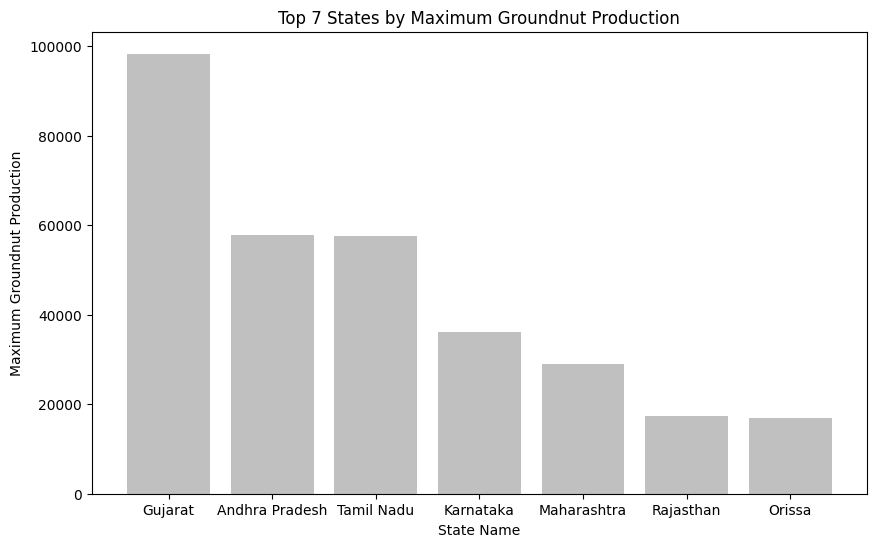

In [ ]:
import matplotlib.pyplot as plt
import pymysql
import pandas as pd
connection = pymysql.connect(
    host="gateway01.ap-southeast-1.prod.aws.tidbcloud.com",
    port=4000,
    user="2UUkERace9vWJvM.root",
    password="csTRyi9ITkoTl4XY",
    database="PROJECT2",
    ssl_verify_cert=True,
    ssl_verify_identity=True,
)

try:
  with connection.cursor() as cursor:
    query = """
    SELECT SUM(groundnut_production) AS max_groundnut_production, state_name  # Use MAX aggregate function and alias the column
    FROM AGRI
    GROUP BY state_name
    ORDER BY max_groundnut_production DESC  # Order by the aliased column
    LIMIT 7
    """
    cursor.execute(query)
    result = cursor.fetchall()
    df = pd.DataFrame(result)
    print(df)
    df.columns = ['max_groundnut_production', 'state_name']
    plt.figure(figsize=(10, 6))
    plt.bar(df['state_name'], df['max_groundnut_production'], color='silver')
    plt.xlabel('State Name')
    plt.ylabel('Maximum Groundnut Production')
    plt.title('Top 7 States by Maximum Groundnut Production')
    plt.show()
finally:
  connection.close()

In [ ]:
connection = pymysql.connect(
    host="gateway01.ap-southeast-1.prod.aws.tidbcloud.com",
    port=4000,
    user="2UUkERace9vWJvM.root",
    password="csTRyi9ITkoTl4XY",
    database="PROJECT2",
    ssl_verify_cert=True,
    ssl_verify_identity=True,
)
mycursor = connection.cursor()

            0                 1
0   153594.79    Madhya Pradesh
1   126224.01           Gujarat
2   122726.86         Rajasthan
3    95567.91       Maharashtra
4    76888.09    Andhra Pradesh
5    55275.03        Tamil Nadu
6    52599.04         Karnataka
7    28453.77            Orissa
8    24015.98     Uttar Pradesh
9    24006.60           Haryana
10   22178.32         Telangana
11   15323.57       West Bengal
12    7800.42            Punjab
13    6995.43             Assam
14    5611.58      Chhattisgarh
15    2599.92             Bihar
16    1192.77            Kerala
17     409.35         Jharkhand
18     297.32  Himachal Pradesh
19     229.22       Uttarakhand


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Madhya Pradesh'),
  Text(1, 0, 'Gujarat'),
  Text(2, 0, 'Rajasthan'),
  Text(3, 0, 'Maharashtra'),
  Text(4, 0, 'Andhra Pradesh'),
  Text(5, 0, 'Tamil Nadu'),
  Text(6, 0, 'Karnataka'),
  Text(7, 0, 'Orissa'),
  Text(8, 0, 'Uttar Pradesh'),
  Text(9, 0, 'Haryana'),
  Text(10, 0, 'Telangana'),
  Text(11, 0, 'West Bengal'),
  Text(12, 0, 'Punjab'),
  Text(13, 0, 'Assam'),
  Text(14, 0, 'Chhattisgarh'),
  Text(15, 0, 'Bihar'),
  Text(16, 0, 'Kerala'),
  Text(17, 0, 'Jharkhand'),
  Text(18, 0, 'Himachal Pradesh'),
  Text(19, 0, 'Uttarakhand')])

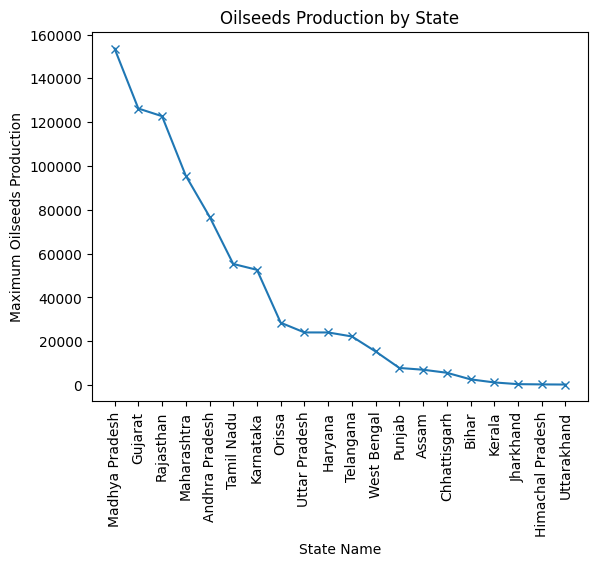

In [ ]:
mycursor.execute("SELECT SUM(oilseeds_production) AS total_oilseeds_production_by_state, state_name FROM AGRI GROUP BY state_name ORDER BY SUM(oilseeds_production) DESC")
myresult = mycursor.fetchall()
df = pd.DataFrame(myresult)
print(df)
df.columns = ['max_oilseeds_production', 'state_name']
plt.plot(df['state_name'], df['max_oilseeds_production'], marker='x')
plt.xlabel('State Name')
plt.ylabel('Maximum Oilseeds Production')
plt.title('Oilseeds Production by State')
plt.xticks(rotation=90)  # Rotate x

                   0           1           2
0     Andhra Pradesh   116956.69  1337079.18
1              Assam   558080.41   708457.90
2              Bihar   992099.68   730287.40
3       Chhattisgarh   311869.75   335014.04
4            Gujarat  1991362.26   989691.47
5            Haryana  1161151.95   796460.55
6   Himachal Pradesh   630164.41   574244.15
7          Jharkhand   349397.48   346166.10
8          Karnataka   566556.69  2125721.28
9             Kerala     4000.00   995867.63
10    Madhya Pradesh  2930771.89  1575672.54
11       Maharashtra  1288086.69  1463057.73
12            Orissa  1054791.18   830195.06
13            Punjab  2007153.14  1773440.44
14         Rajasthan  2722217.00   930383.04
15        Tamil Nadu    18561.25  1755871.99
16         Telangana   251075.04  1020098.92
17     Uttar Pradesh  5208756.43  3767642.74
18       Uttarakhand   494578.11   508766.33
19       West Bengal  1438980.99  1443769.07


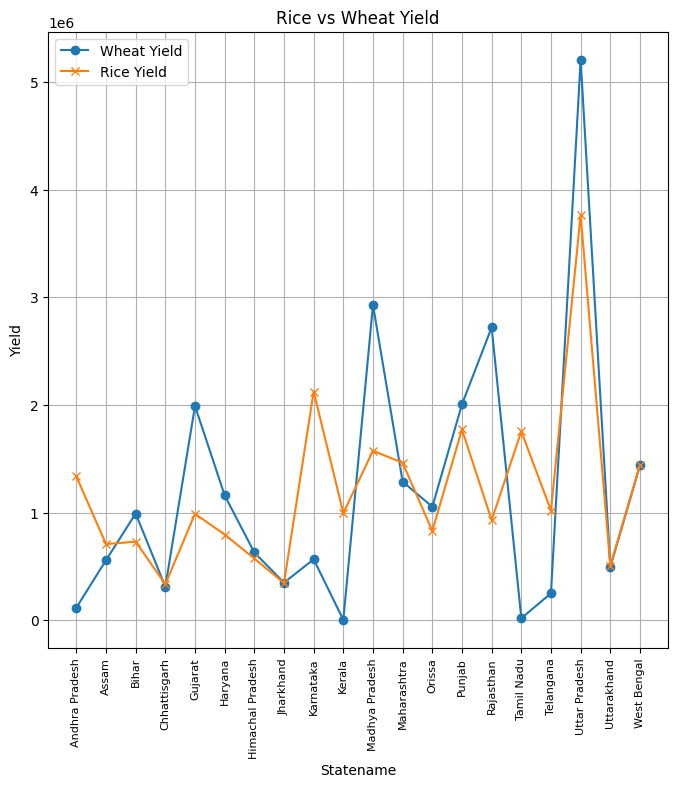

In [ ]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt

connection = pymysql.connect(
    host="gateway01.ap-southeast-1.prod.aws.tidbcloud.com",
    port=4000,
    user="2UUkERace9vWJvM.root",
    password="csTRyi9ITkoTl4XY",
    database="PROJECT2",
    ssl_verify_cert=True,
    ssl_verify_identity=True,
)

try:
  with connection.cursor() as cursor:

    query = """
    SELECT state_name, SUM(wheat_yield) AS total_yield, SUM(rice_yield) AS total_rice_yield
    FROM AGRI
    GROUP BY state_name
    ORDER BY state_name;
    """
    cursor.execute(query)
    result = cursor.fetchall()
    df = pd.DataFrame(result)
    print(df)
    df.columns = ['Statename', 'Total Wheat Yield', 'Total Rice Yield']
    plt.figure(figsize=(8,8))
    plt.plot(df['Statename'], df['Total Wheat Yield'], label='Wheat Yield', marker='o')
    plt.plot(df['Statename'], df['Total Rice Yield'], label='Rice Yield', marker='x')
    plt.xlabel('Statename')
    plt.ylabel('Yield')
    plt.title('Rice vs Wheat Yield')
    plt.legend()
    plt.xticks(rotation=90, fontsize=8)
    plt.grid(True)
    plt.show()


finally:
  connection.close()


                   0          1      2
0        Maharashtra  116655.48  85495
1     Madhya Pradesh   56642.83    104
2          Karnataka   35279.76  42759
3      Uttar Pradesh   18346.30      0
4         Tamil Nadu   18108.40   5510
5          Rajasthan   16850.58      0
6          Telangana   13837.10  11956
7            Gujarat   11373.12   4333
8     Andhra Pradesh    6195.47  11396
9            Haryana    1726.00      0
10            Orissa     713.50      0
11      Chhattisgarh     464.22     26
12             Bihar     125.48      0
13            Kerala      53.90      0
14            Punjab      51.30      0
15         Jharkhand      14.54      0
16       West Bengal       8.76      0
17       Uttarakhand       1.40      0
18             Assam       0.00      0
19  Himachal Pradesh     -38.35    -40


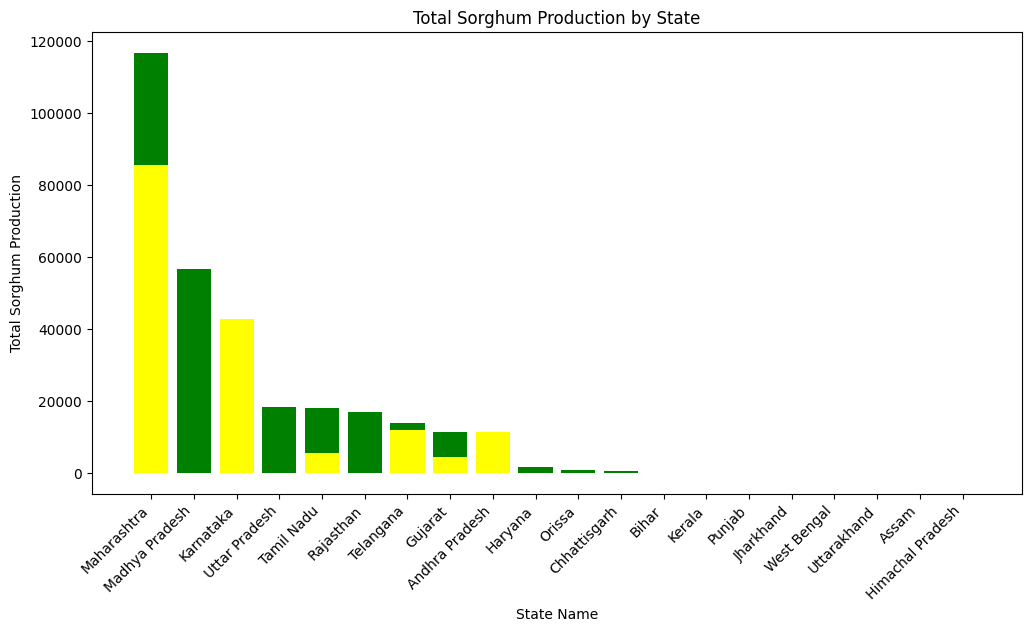

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
connection = pymysql.connect(
    host="gateway01.ap-southeast-1.prod.aws.tidbcloud.com",
    port=4000,
    user="2UUkERace9vWJvM.root",
    password="csTRyi9ITkoTl4XY",
    database="PROJECT2",
    ssl_verify_cert=True,
    ssl_verify_identity=True,
)

try:
  with connection.cursor() as cursor:
    query = """
    SELECT state_name, SUM(kharif_sorghum_production) AS total_sorghum_production, SUM(rabi_sorghum_production) AS total_rabi_sorghum_production
    FROM soybean
    GROUP BY state_name
    ORDER BY total_sorghum_production DESC,total_rabi_sorghum_production DESC;
    """
    cursor.execute(query)
    result = cursor.fetchall()
    df = pd.DataFrame(result)
    print(df)

    # Plotting the bar chart
    df.columns = ['state_name', 'total_sorghum_production','total_rabi_sorghum_production']
    plt.figure(figsize=(12, 6))
    plt.bar(df['state_name'], df['total_sorghum_production'], color='green')
    plt.bar(df['state_name'], df['total_rabi_sorghum_production'], color='yellow')
    plt.xlabel('State Name')
    plt.ylabel('Total Sorghum Production')
    plt.title('Total Sorghum Production by State')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()

finally:
  connection.close()

                0       1
0  Madhya Pradesh  136041
1     Maharashtra   58681
2       Rajasthan   21173
3       Telangana    3020
4       Karnataka    2863


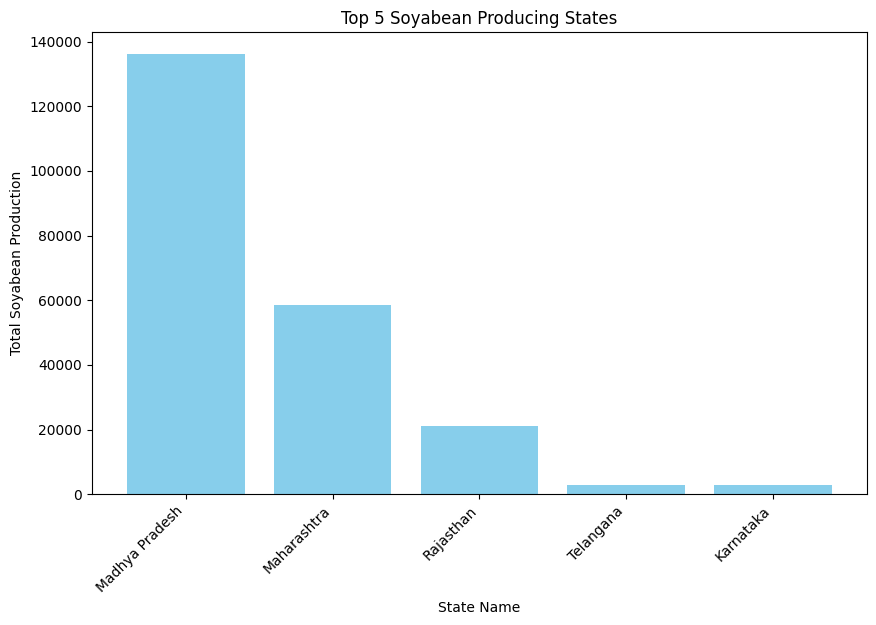


Yield Efficiency:
                0        1
0  Madhya Pradesh  1161169
1     Maharashtra   770940
2       Rajasthan   404605
3   Uttar Pradesh   341800
4     Uttarakhand   254564


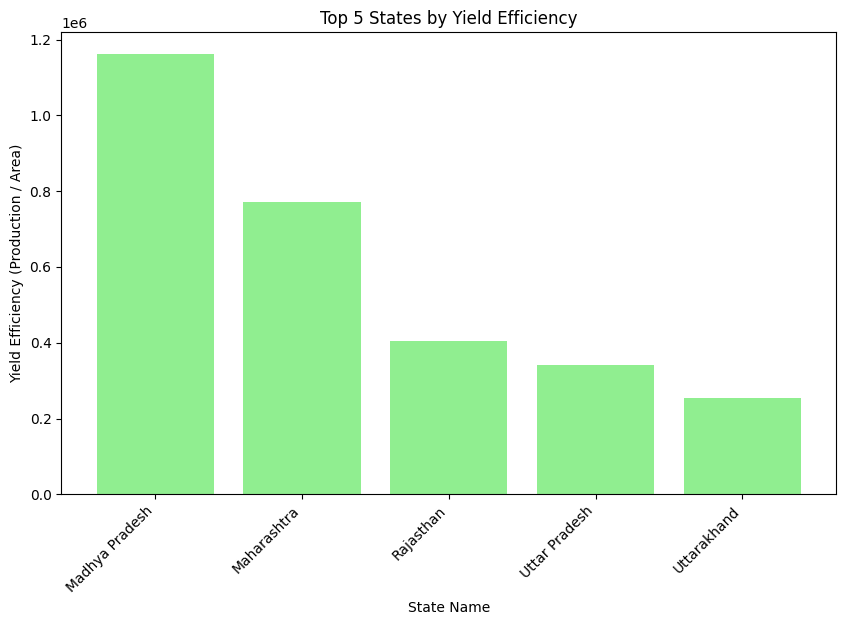

In [13]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt

connection = pymysql.connect(
    host="gateway01.ap-southeast-1.prod.aws.tidbcloud.com",
    port=4000,
    user="2UUkERace9vWJvM.root",
    password="csTRyi9ITkoTl4XY",
    database="PROJECT2",
    ssl_verify_cert=True,
    ssl_verify_identity=True,
)

try:
    with connection.cursor() as cursor:
        query = """
        SELECT state_name, SUM(soyabean_production) AS total_soyabean_production
        FROM AGRI  -- Assuming your soybean data is in a table named 'soybean'
        GROUP BY state_name
        ORDER BY total_soyabean_production DESC
        LIMIT 5;
        """
        cursor.execute(query)
        result = cursor.fetchall()
        df = pd.DataFrame(result)
        print(df)

        # Plotting the bar chart
        df.columns = ['state_name', 'total_soyabean_production']
        plt.figure(figsize=(10, 6))
        plt.bar(df['state_name'], df['total_soyabean_production'], color='skyblue')
        plt.xlabel('State Name')
        plt.ylabel('Total Soyabean Production')
        plt.title('Top 5 Soyabean Producing States')
        plt.xticks(rotation=45, ha='right')
        plt.show()

        query_yield = """
            SELECT state_name, SUM(soyabean_yield) AS yield_efficiency
            FROM soybean
            GROUP BY state_name
            ORDER BY yield_efficiency DESC
            LIMIT 5;
        """
        cursor.execute(query_yield)
        yield_result = cursor.fetchall()
        yield_df = pd.DataFrame(yield_result)
        print("\nYield Efficiency:")
        print(yield_df)

        # Plot yield efficiency (Example)
        yield_df.columns = ['state_name', 'yield_efficiency']
        plt.figure(figsize=(10, 6))
        plt.bar(yield_df['state_name'], yield_df['yield_efficiency'], color='lightgreen')
        plt.xlabel('State Name')
        plt.ylabel('Yield Efficiency (Production / Area)')  # Adjust label as needed
        plt.title('Top 5 States by Yield Efficiency')
        plt.xticks(rotation=45, ha='right')
        plt.show()

finally:
    connection.close()

                   0     1        2
0          Rajasthan  2016   140.27
1          Rajasthan  2014   139.12
2          Rajasthan  2017   133.10
3        Uttarakhand  2017   462.89
4        Uttarakhand  2015   431.22
5        Uttarakhand  2016   429.93
6              Assam  2017  1051.16
7              Assam  2010   993.12
8              Assam  2014   992.44
9             Orissa  2012  1586.60
10            Orissa  2014  1567.98
11            Orissa  2016  1254.27
12    Andhra Pradesh  2017  1693.91
13    Andhra Pradesh  2003  1679.72
14    Andhra Pradesh  2017  1672.79
15         Jharkhand  2016  1195.51
16         Jharkhand  2017  1124.50
17         Jharkhand  2001   747.16
18         Karnataka  2013   836.00
19         Karnataka  2010   787.56
20         Karnataka  2008   786.48
21            Kerala  1981   385.39
22            Kerala  1979   381.56
23            Kerala  1969   374.45
24    Madhya Pradesh  2017   689.45
25    Madhya Pradesh  2016   675.33
26    Madhya Pradesh  2016  

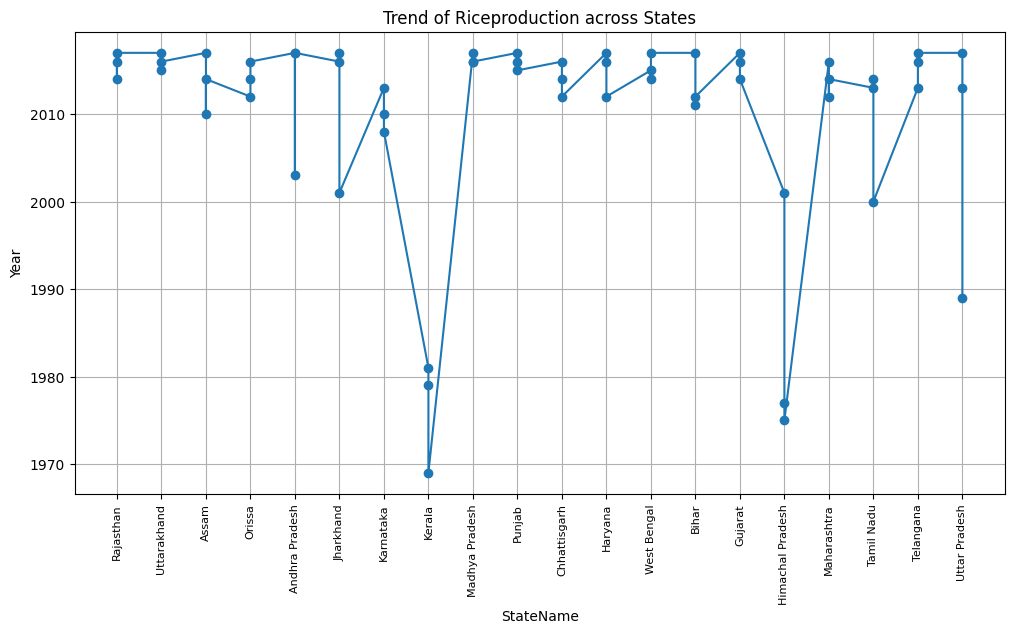

In [3]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
connection = pymysql.connect(
    host="gateway01.ap-southeast-1.prod.aws.tidbcloud.com",
    port=4000,
    user="2UUkERace9vWJvM.root",
    password="csTRyi9ITkoTl4XY",
    database="PROJECT2",
    ssl_verify_cert=True,
    ssl_verify_identity=True,
)

try:
  with connection.cursor() as cursor:
    query = """
    SELECT state_name, year,rice_production
    FROM (
        SELECT
            state_name,
            year,
            rice_production,
            ROW_NUMBER() OVER (PARTITION BY state_name ORDER BY rice_production DESC) AS rank_num
        FROM AGRI
    ) ranked_agri
    WHERE rank_num <= 3;
    """
    cursor.execute(query)
    result = cursor.fetchall()
    df = pd.DataFrame(result)
    print(df)
    df.columns = ['state_name', 'year', 'rice_production']
    plt.figure(figsize=(12, 6))
    plt.plot(df['state_name'], df['year'], marker='o')
    plt.xlabel('StateName')
    plt.ylabel('Year')
    plt.title("Trend of Riceproduction across States")
    plt.xticks(rotation=90, fontsize=8)
    plt.grid(True)
    plt.show()

finally:
  connection.close()


          0         1
0   Sangrur  26012.33
1  Bhatinda  24782.29
2  Ludhiana  24579.98
3  Ferozpur  24497.39
4   Patiala  24250.38


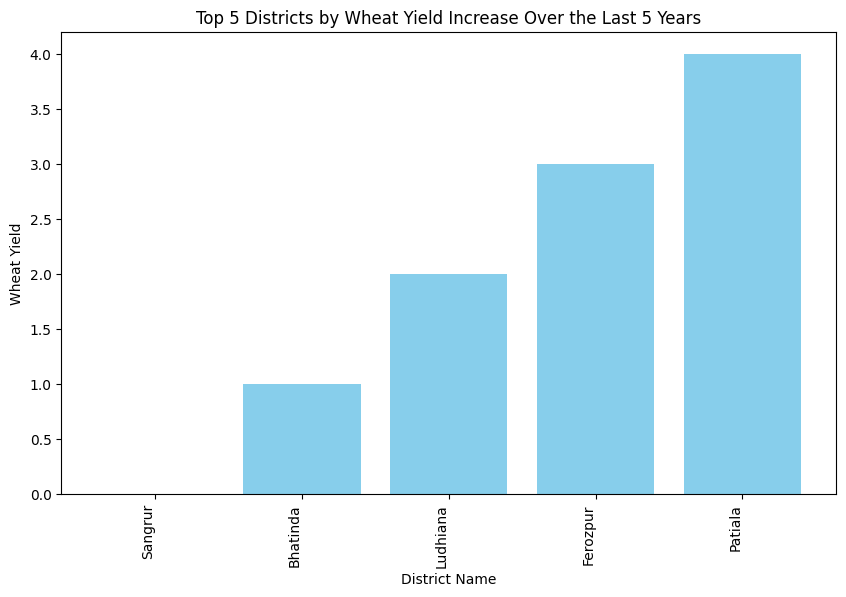

In [24]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt

connection = pymysql.connect(
    host="gateway01.ap-southeast-1.prod.aws.tidbcloud.com",
    port=4000,
    user="2UUkERace9vWJvM.root",
    password="csTRyi9ITkoTl4XY",
    database="PROJECT2",
    ssl_verify_cert=True,
    ssl_verify_identity=True,
)

try:
    with connection.cursor() as cursor:
        query = """
            SELECT dist_name, SUM(wheat_yield) AS wheat_yield
            FROM AGRI
            WHERE year BETWEEN 2013 AND 2017
            GROUP BY dist_name
            ORDER BY wheat_yield DESC
            LIMIT 5;
        """
        cursor.execute(query)
        result = cursor.fetchall()
        df = pd.DataFrame(result)
        print(df)
        # Plotting (optional, but recommended for visualization)
        df.columns = ['District Name','Wheat Yield']
        plt.figure(figsize=(10, 6))
        plt.bar(df['District Name'], range(len(df)), color='skyblue') # Replace range with actual yield increase values if available
        plt.xlabel('District Name')
        plt.ylabel('Wheat Yield')
        plt.title('Top 5 Districts by Wheat Yield Increase Over the Last 5 Years')
        plt.xticks(rotation=90, ha='right')
        plt.show()


finally:
    connection.close()

                0           1
0         Haryana   35.816649
1  Andhra Pradesh   27.299730
2          Orissa  -31.312135
3       Jharkhand -100.000000
4       Rajasthan -100.000000
5    Chhattisgarh -100.000000
6          Punjab -100.000000
7     West Bengal -100.000000
8           Assam -100.000000
9  Madhya Pradesh -100.000000


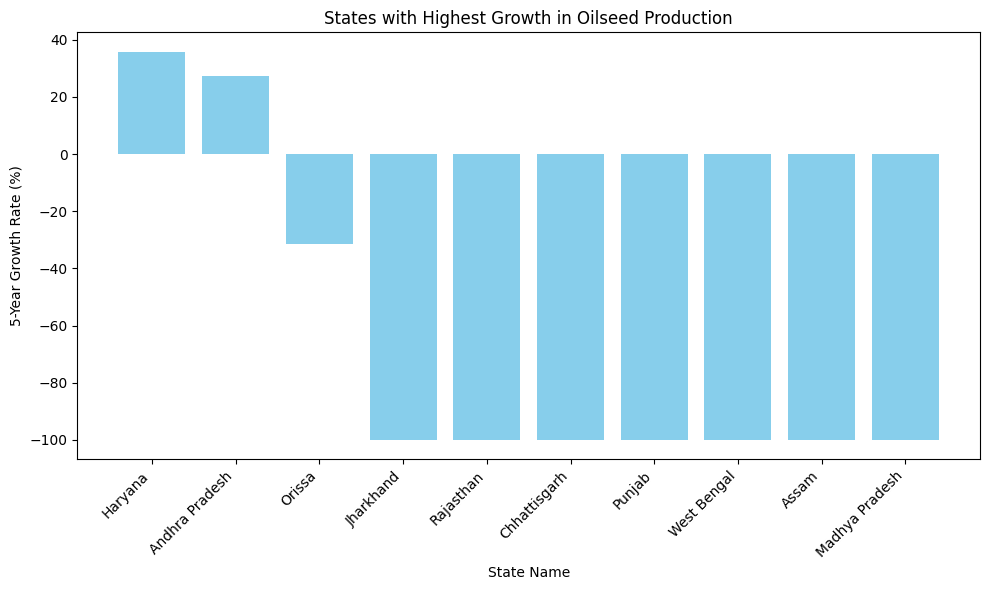

In [ ]:
# States with the Highest Growth in Oilseed Production (5-Year Growth Rate)

import pandas as pd
import matplotlib.pyplot as plt
connection = pymysql.connect(
    host="gateway01.ap-southeast-1.prod.aws.tidbcloud.com",
    port=4000,
    user="2UUkERace9vWJvM.root",
    password="csTRyi9ITkoTl4XY",
    database="PROJECT2",
    ssl_verify_cert=True,
    ssl_verify_identity=True,
)

try:
  with connection.cursor() as cursor:
    query = """
    WITH ProductionGrowth AS (
        SELECT
            state_name,
            MAX(CASE WHEN year = (SELECT MAX(year) FROM AGRI) THEN oilseeds_production END) AS latest_oilseeds_production,
            MAX(CASE WHEN year = (SELECT MAX(year) - 4 FROM AGRI) THEN oilseeds_production END) AS old_oilseeds_production
        FROM AGRI
        WHERE year IN ((SELECT MAX(year) FROM AGRI), (SELECT MAX(year) - 4 FROM AGRI))
        GROUP BY state_name
    )
    SELECT
        state_name,
        ((latest_oilseeds_production - old_oilseeds_production) / old_oilseeds_production) * 100 AS growth_rate
    FROM ProductionGrowth
    WHERE old_oilseeds_production IS NOT NULL AND latest_oilseeds_production IS NOT NULL
    ORDER BY growth_rate DESC
    LIMIT 10;
    """
    cursor.execute(query)
    result = cursor.fetchall()
    df = pd.DataFrame(result)
    print(df)
    df.columns = ['state_name', 'growth_rate']
    plt.figure(figsize=(10, 6))
    plt.bar(df['state_name'], df['growth_rate'], color='skyblue')
    plt.xlabel('State Name')
    plt.ylabel('5-Year Growth Rate (%)')
    plt.title('States with Highest Growth in Oilseed Production')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


finally:
  connection.close()


                        0         1         2
0                  Chamba    153.02    192.13
1           Surendranagar     28.81     44.96
2    Khandwa / East Nimar   1223.08   1019.42
3                   Gonda  12580.35  16849.99
4                  Raipur  44700.38  55891.35
..                    ...       ...       ...
306                 Saran  13513.74  15486.05
307            Saharanpur   4487.54   8648.63
308               Vidisha     77.72     68.49
309            Pratapgarh   5126.83   8003.98
310               Birbhum  18525.65  42213.81

[311 rows x 3 columns]
Correlation between Area and Production for Rice: 0.8928835265002901


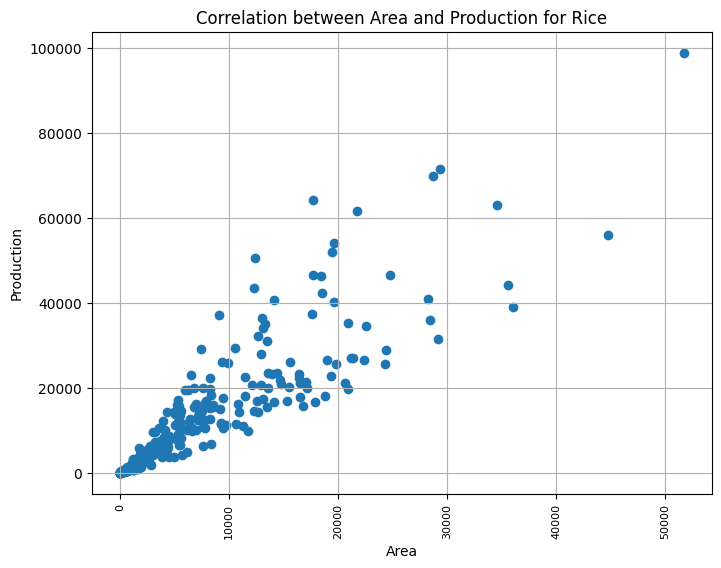

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
connection = pymysql.connect(
    host="gateway01.ap-southeast-1.prod.aws.tidbcloud.com",
    port=4000,
    user="2UUkERace9vWJvM.root",
    password="csTRyi9ITkoTl4XY",
    database="PROJECT2",
    ssl_verify_cert=True,
    ssl_verify_identity=True,
)

try:
  with connection.cursor() as cursor:
    query = """
    SELECT dist_name,SUM(rice_area) AS total_rice_area,SUM(rice_production) AS total_rice_production
    FROM AGRI
    GROUP BY dist_name
    ;


"""
    cursor.execute(query)
    result = cursor.fetchall()
    df = pd.DataFrame(result)
    print(df)
    df.columns = ['dist_name', 'rice_area', 'rice_production']
    correlation = df['rice_area'].corr(df['rice_production'])
    print(f"Correlation between Area and Production for Rice: {correlation}")

# Plotting the correlation
    plt.figure(figsize=(8, 6))
    plt.scatter(df['rice_area'], df['rice_production'])
    plt.xlabel('Area')
    plt.ylabel('Production')
    plt.title('Correlation between Area and Production for Rice')
    plt.grid(True)
    plt.xticks(rotation=90, fontsize=8)
    plt.show()


finally:
  connection.close()

                 0         1         2
0    East Godavari      0.00      0.00
1         Ghazipur   6635.68  14235.25
2            Dhule   2062.16   2817.03
3           Hassan      7.75     12.13
4           Bastar    111.61    129.87
..             ...       ...       ...
306     Chhatarpur   5967.42   9174.76
307          Salem      2.20      0.57
308      Gurdaspur  10188.66  34473.00
309         Barmer    761.56   1226.11
310   Shahjahanpur  10642.05  28319.10

[311 rows x 3 columns]
Correlation between Area and Production for Wheat: 0.9415459498589003


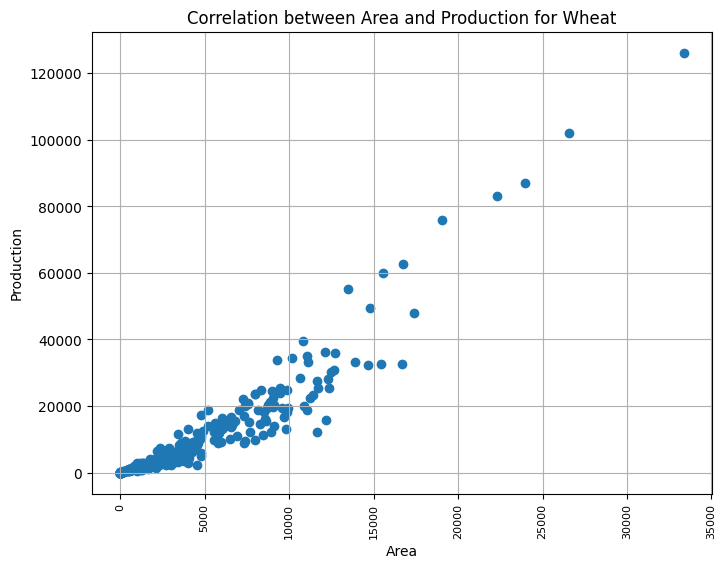

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
connection = pymysql.connect(
    host="gateway01.ap-southeast-1.prod.aws.tidbcloud.com",
    port=4000,
    user="2UUkERace9vWJvM.root",
    password="csTRyi9ITkoTl4XY",
    database="PROJECT2",
    ssl_verify_cert=True,
    ssl_verify_identity=True,
)

try:
  with connection.cursor() as cursor:
    query = """
    SELECT dist_name,SUM(wheat_area) AS total_wheat_area,SUM(wheat_production) AS total_wheat_production
    FROM AGRI
    GROUP BY dist_name
    ;


"""
    cursor.execute(query)
    result = cursor.fetchall()
    df = pd.DataFrame(result)
    print(df)
    df.columns = ['dist_name', 'wheat_area', 'wheat_production']
    correlation = df['wheat_area'].corr(df['wheat_production'])
    print(f"Correlation between Area and Production for Wheat: {correlation}")

# Plotting the correlation
    plt.figure(figsize=(8, 6))
    plt.scatter(df['wheat_area'], df['wheat_production'])
    plt.xlabel('Area')
    plt.ylabel('Production')
    plt.title('Correlation between Area and Production for Wheat')
    plt.grid(True)
    plt.xticks(rotation=90, fontsize=8)
    plt.show()


finally:
  connection.close()

              0        1        2
0       Mehsana    41.28    48.84
1    Hoshiarpur  3787.05  8407.99
2        Nagaur    25.03    22.87
3        Jhansi  1258.73  1263.52
4       Sirmaur  1188.08  2799.52
..          ...      ...      ...
306   Dungarpur  3067.78  2595.39
307        Kota  1397.08  1710.99
308        Beed   331.49   381.66
309     Dhanbad   195.68   196.53
310    Kolhapur   332.14   681.72

[311 rows x 3 columns]
Correlation between Area and Production for Maize: 0.8837480412762805


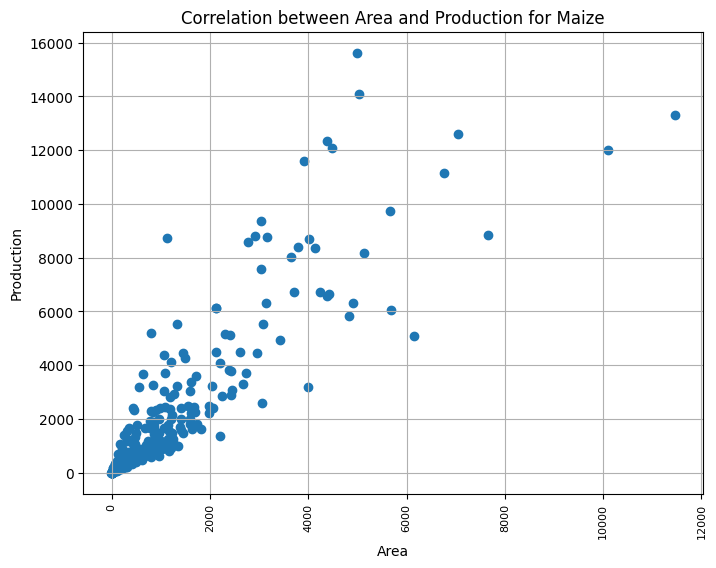

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
connection = pymysql.connect(
    host="gateway01.ap-southeast-1.prod.aws.tidbcloud.com",
    port=4000,
    user="2UUkERace9vWJvM.root",
    password="csTRyi9ITkoTl4XY",
    database="PROJECT2",
    ssl_verify_cert=True,
    ssl_verify_identity=True,
)

try:
  with connection.cursor() as cursor:
    query = """
    SELECT dist_name,SUM(maize_area) AS total_maize_area,SUM(maize_production) AS total_maize_production
    FROM AGRI
    GROUP BY dist_name
    ;


"""
    cursor.execute(query)
    result = cursor.fetchall()
    df = pd.DataFrame(result)
    print(df)
    df.columns = ['dist_name', 'maize_area', 'maize_production']
    correlation = df['maize_area'].corr(df['maize_production'])
    print(f"Correlation between Area and Production for Maize: {correlation}")

# Plotting the correlation
    plt.figure(figsize=(8, 6))
    plt.scatter(df['maize_area'], df['maize_production'])
    plt.xlabel('Area')
    plt.ylabel('Production')
    plt.title('Correlation between Area and Production for Maize')
    plt.grid(True)
    plt.xticks(rotation=90, fontsize=8)
    plt.show()


finally:
  connection.close()

In [ ]:
!pip install pymysql

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 1.3 MB/s eta 0:00:00


     state_name  year  cotton_production  yearly_growth
0       Gujarat  2002                  2            NaN
1       Gujarat  1983                  7     250.000000
2       Gujarat  1968                 32     357.142857
3       Gujarat  1969                 37      15.625000
4       Gujarat  1970                 29     -21.621622
...         ...   ...                ...            ...
3683  Telangana  1988                  9     -35.714286
3684  Telangana  1987                 14      55.555556
3685  Telangana  1986                 15       7.142857
3686  Telangana  1985                 12     -20.000000
3687  Telangana  1984                  7     -41.666667

[3688 rows x 4 columns]


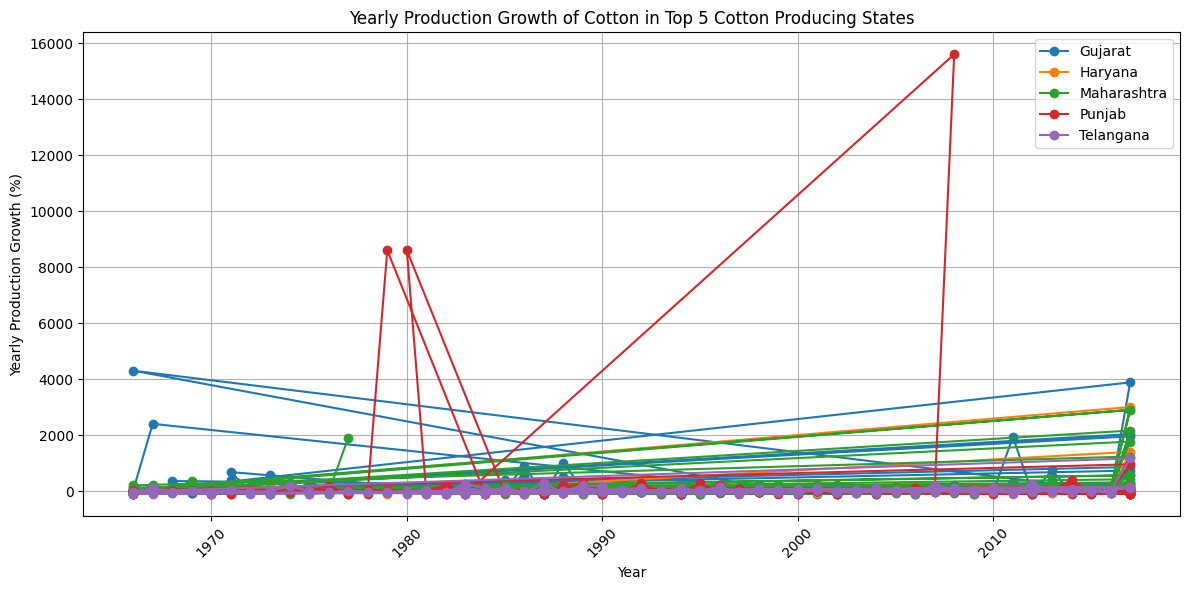

In [ ]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt

connection = pymysql.connect(
    host="gateway01.ap-southeast-1.prod.aws.tidbcloud.com",
    port=4000,
    user="2UUkERace9vWJvM.root",
    password="csTRyi9ITkoTl4XY",
    database="PROJECT2",
    ssl_verify_cert=True,
    ssl_verify_identity=True,
)

try:
  with connection.cursor() as cursor:
    query = """
    SELECT state_name, year, cotton_production
    FROM AGRI
    WHERE state_name IN (SELECT state_name FROM AGRI GROUP BY state_name ORDER BY SUM(cotton_production) DESC LIMIT 5)
    AND cotton_production IS NOT NULL
    ORDER BY state_name;
    """
    cursor.execute(query)
    result = cursor.fetchall()

    df = pd.DataFrame(result, columns=['state_name', 'year', 'cotton_production'])

    # Calculate yearly growth rate
    df['yearly_growth'] = df.groupby('state_name')['cotton_production'].pct_change() * 100
    print(df)

    # Plotting yearly production growth for each state
    plt.figure(figsize=(12, 6))
    for state in df['state_name'].unique():
        state_data = df[df['state_name'] == state]
        plt.plot(state_data['year'], state_data['yearly_growth'], label=state, marker='o')

    plt.xlabel('Year')
    plt.ylabel('Yearly Production Growth (%)')
    plt.title('Yearly Production Growth of Cotton in Top 5 Cotton Producing States')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

finally:
  connection.close()


                       0       1
0               Jamnagar  977.65
1               Junagadh  945.49
2                 Rajkot  873.87
3                Bikaner  514.09
4             Ananthapur  454.94
5            Banaskantha  288.21
6  North Arcot / Vellore  280.51
7           Mahabubnagar  273.25
8               Chittoor  263.38
9            Sabarkantha  244.48


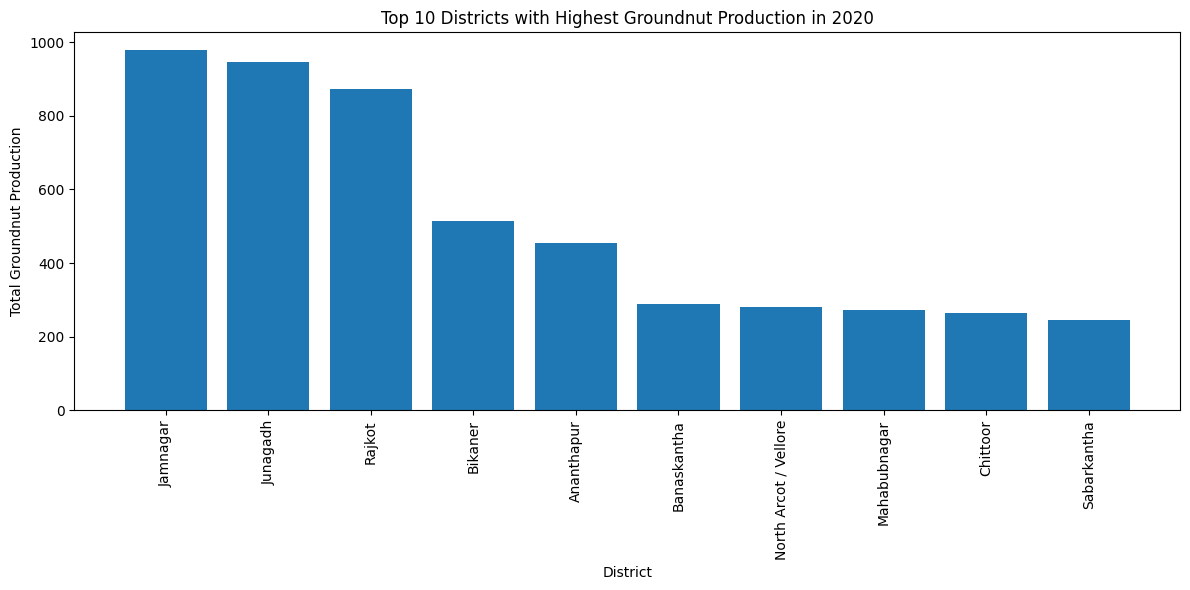

In [ ]:
#Districts with the Highest Groundnut Production in 2020

import pymysql
import pandas as pd
import matplotlib.pyplot as plt

connection = pymysql.connect(
    host="gateway01.ap-southeast-1.prod.aws.tidbcloud.com",
    port=4000,
    user="2UUkERace9vWJvM.root",
    password="csTRyi9ITkoTl4XY",
    database="PROJECT2",
    ssl_verify_cert=True,
    ssl_verify_identity=True,
)

try:
  with connection.cursor() as cursor:
    query = """
    SELECT dist_name, SUM(groundnut_production) AS total_groundnut_production
    FROM AGRI
    WHERE year = 2017  # Filter for the year 2020
    GROUP BY dist_name
    ORDER BY total_groundnut_production DESC
    LIMIT 10;  # Display the top 10 districts
    """
    cursor.execute(query)
    result = cursor.fetchall()
    df = pd.DataFrame(result)
    print(df)
    df.columns = ['District', 'Total Groundnut Production']
    plt.figure(figsize=(12, 6))
    plt.bar(df['District'], df['Total Groundnut Production'])
    plt.xlabel('District')
    plt.ylabel('Total Groundnut Production')
    plt.title('Top 10 Districts with Highest Groundnut Production in 2020')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
finally:
  connection.close()


                   0            1
0     Andhra Pradesh  3124.902378
1          Karnataka  2609.564332
2          Telangana  2338.194722
3             Punjab  2070.729301
4   Himachal Pradesh  1936.657558
5              Bihar  1873.980070
6         Tamil Nadu  1808.193846
7        West Bengal  1584.509910
8        Maharashtra  1288.757901
9       Chhattisgarh  1282.810192
10    Madhya Pradesh  1228.781346
11            Orissa  1228.204364
12         Jharkhand  1142.899467
13     Uttar Pradesh  1116.997834
14           Gujarat  1033.584135
15       Uttarakhand   999.866755
16           Haryana   975.607390
17         Rajasthan   842.258757
18             Assam   809.638577
19            Kerala    44.309864


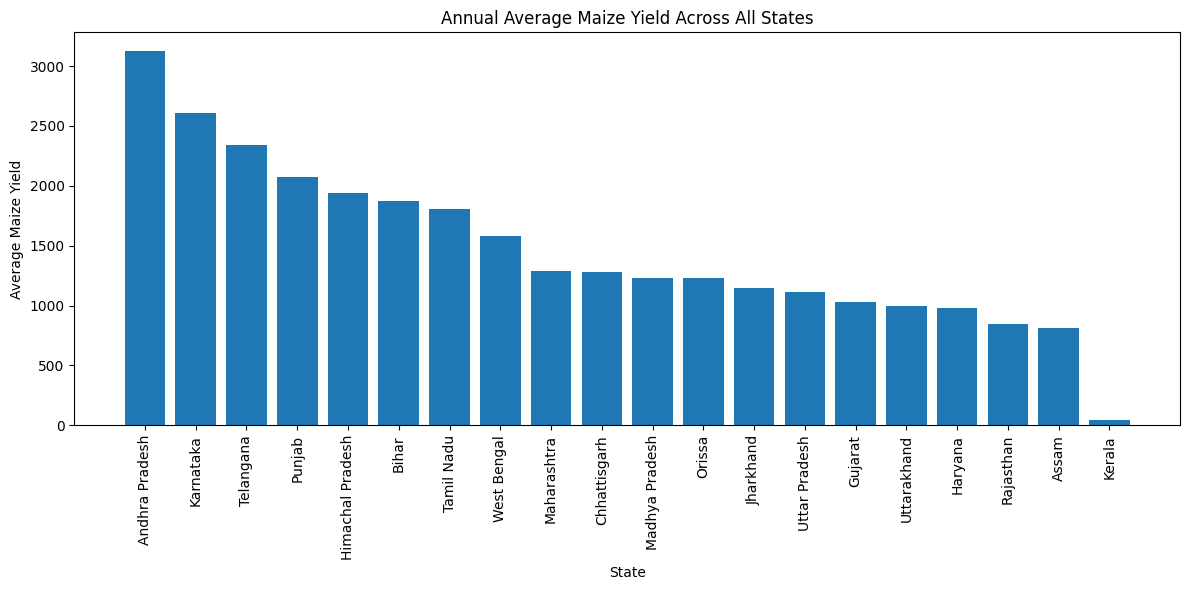

In [ ]:
# Annual Average Maize Yield Across All States

import pymysql
import pandas as pd
import matplotlib.pyplot as plt



connection = pymysql.connect(
    host="gateway01.ap-southeast-1.prod.aws.tidbcloud.com",
    port=4000,
    user="2UUkERace9vWJvM.root",
    password="csTRyi9ITkoTl4XY",
    database="PROJECT2",
    ssl_verify_cert=True,
    ssl_verify_identity=True,
)

try:
  with connection.cursor() as cursor:
    query = """
        SELECT state_name, AVG(maize_yield) AS avg_maize_yield
        FROM AGRI
        GROUP BY state_name
        ORDER BY avg_maize_yield DESC;
    """
    cursor.execute(query)
    result = cursor.fetchall()
    df = pd.DataFrame(result)
    print(df)
    df.columns = ['State', 'Average Maize Yield']

    plt.figure(figsize=(12, 6))
    plt.bar(df['State'], df['Average Maize Yield'])
    plt.xlabel('State')
    plt.ylabel('Average Maize Yield')
    plt.title('Annual Average Maize Yield Across All States')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

finally:
  connection.close()


                   0          1
0     Madhya Pradesh  189945.92
1          Rajasthan  142433.47
2        Maharashtra  134069.16
3            Gujarat  130724.71
4          Karnataka   92527.23
5     Andhra Pradesh   87223.49
6         Tamil Nadu   56225.64
7      Uttar Pradesh   43047.07
8             Orissa   39682.05
9          Telangana   35293.43
10            Kerala   34348.94
11           Haryana   21465.54
12       West Bengal   20300.76
13      Chhattisgarh   17267.08
14             Assam   14176.64
15            Punjab    8697.93
16             Bihar    5536.29
17         Jharkhand    2826.29
18       Uttarakhand     993.53
19  Himachal Pradesh     799.25


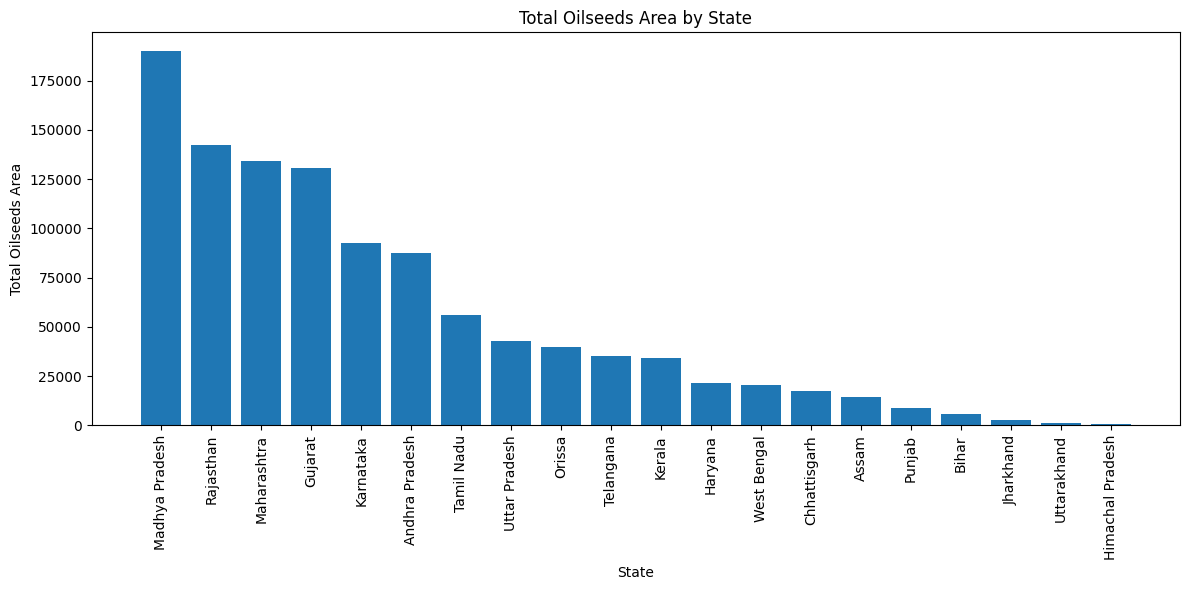

In [ ]:
# prompt: Total Area Cultivated for Oilseeds in Each State

import pymysql
import pandas as pd
import matplotlib.pyplot as plt

connection = pymysql.connect(
    host="gateway01.ap-southeast-1.prod.aws.tidbcloud.com",
    port=4000,
    user="2UUkERace9vWJvM.root",
    password="csTRyi9ITkoTl4XY",
    database="PROJECT2",
    ssl_verify_cert=True,
    ssl_verify_identity=True,
)

try:
  with connection.cursor() as cursor:
    query = """
    SELECT state_name, SUM(oilseeds_area) AS total_oilseeds_area
    FROM AGRI
    GROUP BY state_name
    ORDER BY total_oilseeds_area DESC;
    """
    cursor.execute(query)
    result = cursor.fetchall()
    df = pd.DataFrame(result)
    print(df)
    df.columns = ['State', 'Total Oilseeds Area']
    plt.figure(figsize=(12, 6))
    plt.bar(df['State'], df['Total Oilseeds Area'])
    plt.xlabel('State')
    plt.ylabel('Total Oilseeds Area')
    plt.title('Total Oilseeds Area by State')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

finally:
  connection.close()


              0          1
0      Ludhiana  189822.57
1       Sangrur  183710.63
2  Thirunelveli  176150.29
3      Bhatinda  174884.26
4       Madurai  170403.08
5   Kanyakumari  168516.06
6      Ferozpur  168170.92
7       Patiala  167550.76
8     Jalandhar  165725.44
9         Salem  161334.34


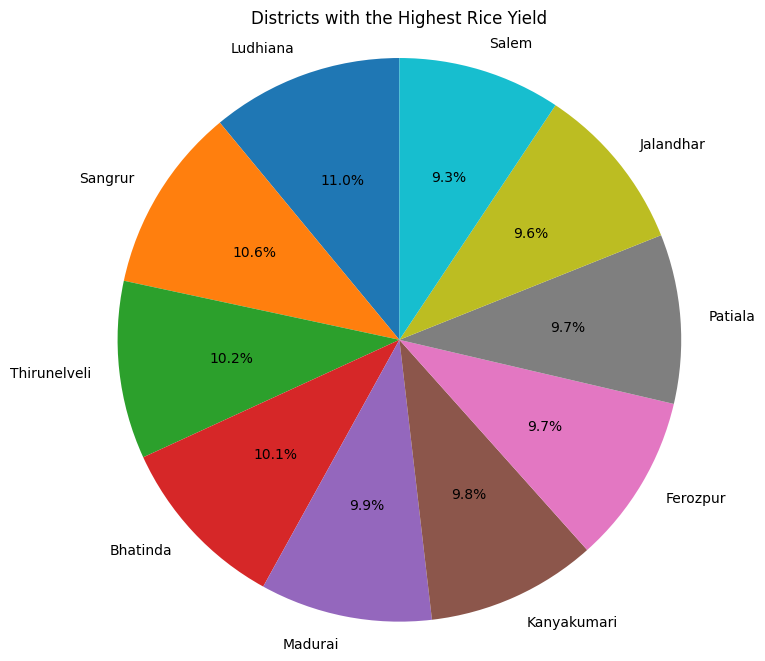

In [ ]:
#Districts with the Highest Rice Yield

import pymysql
import pandas as pd
import matplotlib.pyplot as plt

connection = pymysql.connect(
    host="gateway01.ap-southeast-1.prod.aws.tidbcloud.com",
    port=4000,
    user="2UUkERace9vWJvM.root",
    password="csTRyi9ITkoTl4XY",
    database="PROJECT2",
    ssl_verify_cert=True,
    ssl_verify_identity=True,
)

try:
  with connection.cursor() as cursor:
    query = """
    SELECT dist_name, SUM(rice_yield) AS total_rice_yield
    FROM AGRI
    GROUP BY dist_name
    ORDER BY total_rice_yield DESC
    LIMIT 10;
    """
    cursor.execute(query)
    result = cursor.fetchall()
    df = pd.DataFrame(result)
    print(df)
    df.columns = ['District', 'Total Rice Yield']
    plt.figure(figsize=(8, 8))  # Adjust figure size as needed
    plt.pie(df['Total Rice Yield'], labels=df['District'], autopct='%1.1f%%', startangle=90)
    plt.title('Districts with the Highest Rice Yield')
    plt.axis('equal')
    plt.show()

finally:
  connection.close()


            State  Total Wheat Production  Total Rice Production
0   Uttar Pradesh                97929.89               42583.92
1  Madhya Pradesh                60342.95               13810.93
2          Punjab                51543.00               37843.00
3         Haryana                35998.00               13477.00
4       Rajasthan                34179.61                1273.41


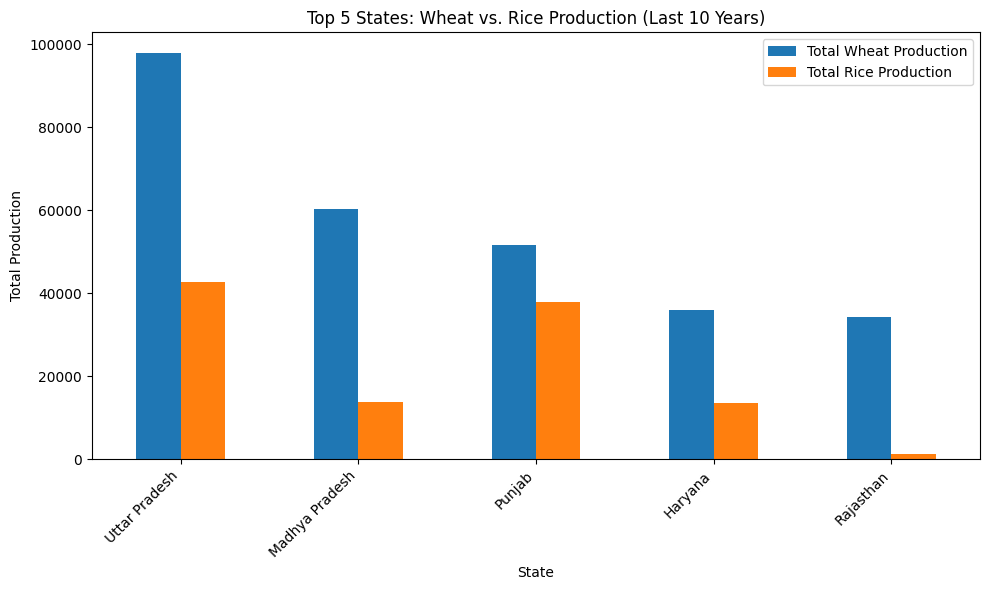

In [ ]:
# Compare the Production of Wheat and Rice for the Top 5 States Over 10 Years

import pandas as pd
import matplotlib.pyplot as plt

connection = pymysql.connect(
    host="gateway01.ap-southeast-1.prod.aws.tidbcloud.com",
    port=4000,
    user="2UUkERace9vWJvM.root",
    password="csTRyi9ITkoTl4XY",
    database="PROJECT2",
    ssl_verify_cert=True,
    ssl_verify_identity=True,
)

try:
  with connection.cursor() as cursor:
    query = """
      SELECT state_name, SUM(wheat_production) AS total_wheat, SUM(rice_production) AS total_rice
      FROM AGRI
      WHERE year BETWEEN YEAR(CURDATE()) - 10 AND YEAR(CURDATE())
      GROUP BY state_name
      ORDER BY total_wheat DESC, total_rice DESC
      LIMIT 5;
    """
    cursor.execute(query)
    result = cursor.fetchall()
    df = pd.DataFrame(result, columns=['State', 'Total Wheat Production', 'Total Rice Production'])
    print(df)
    # Plotting
    df.plot(x='State', y=['Total Wheat Production', 'Total Rice Production'], kind='bar', figsize=(10, 6))
    plt.title('Top 5 States: Wheat vs. Rice Production (Last 10 Years)')
    plt.ylabel('Total Production')
    plt.xlabel('State')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

finally:
  connection.close()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

connection = pymysql.connect(
    host="gateway01.ap-southeast-1.prod.aws.tidbcloud.com",
    port=4000,
    user="2UUkERace9vWJvM.root",
    password="csTRyi9ITkoTl4XY",
    database="PROJECT2",
    ssl_verify_cert=True,
    ssl_verify_identity=True,
)

try:
  with connection.cursor() as cursor:
    query = """
    SELECT dist_name, SUM(rice_production) AS total_rice_production
    FROM AGRI
    WHERE state_name = 'West Bengal'
    GROUP BY dist_name
    ORDER BY total_rice_production DESC;
    """
    cursor.execute(query)
    result = cursor.fetchall()
    df = pd.DataFrame(result)
    print(df)
    df.columns = ['District', 'Rice_Production']
    location_data = {
        'District': ['Midnapur', 'Burdwan', '24 Parganas', 'Birbhum', 'Bankura', 'Murshidabad',
                      'West Dinajpur', 'Hooghly', 'Nadia', 'Purulia', 'Malda', 'Cooch Behar',
                      'Jalpaiguri', 'Howrah', 'Darjeeling'],
        'Latitude': [22.33, 23.24, 22.57, 23.95, 23.24, 24.13, 25.63, 22.6, 23.4, 23.33, 25.03, 26.33, 26.52, 22.58, 27.04],
        'Longitude': [87.32, 87.86, 88.47, 87.69, 87.06, 88.26, 88.16, 88.36, 88.38, 86.36, 88.05, 89.52, 88.74, 88.21, 88.31]
    }
    location_df = pd.DataFrame(location_data)
    df = pd.merge(df, location_df, on='District', how='left')


  fig = px.scatter_mapbox(df, lat="Latitude", lon="Longitude",
                        color="Rice_Production", size="Rice_Production",
                        color_continuous_scale=px.colors.cyclical.IceFire, size_max=30, zoom=4,
                        mapbox_style="carto-positron",
                        hover_name="District",
                        hover_data={"Latitude":False, "Longitude":False, "Rice_Production":True})


  fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
  fig.show()
finally:
  connection.close()

                0         1
0        Midnapur  98868.28
1         Burdwan  71422.15
2     24 Parganas  63011.99
3         Birbhum  42213.81
4         Bankura  40165.20
5     Murshidabad  37261.24
6   West Dinajpur  35224.87
7         Hooghly  30962.21
8           Nadia  28016.30
9         Purulia  23147.50
10          Malda  22497.83
11    Cooch Behar  20949.15
12     Jalpaiguri  17372.00
13         Howrah  10264.53
14     Darjeeling   2855.20
